# Heart Disease Prediction using Machine Learning Algorithms

### Import Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Read dataset and preprocess the data

In [37]:
heartData = pd.read_csv("./dataset/heart.csv")

In [38]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Total missing % of data

In [40]:
missing_data = heartData.isnull().sum()
total_percentage = (missing_data.sum()/heartData.shape[0])*100

print(f"Total percentage of missing data is {round(total_percentage, 2)}%")

duplicate = heartData[heartData.duplicated()]
print("Duplicate rows: ")
duplicate

#drop duplicate rows
heartData = heartData.drop_duplicates()


Total percentage of missing data is 0.0%
Duplicate rows: 


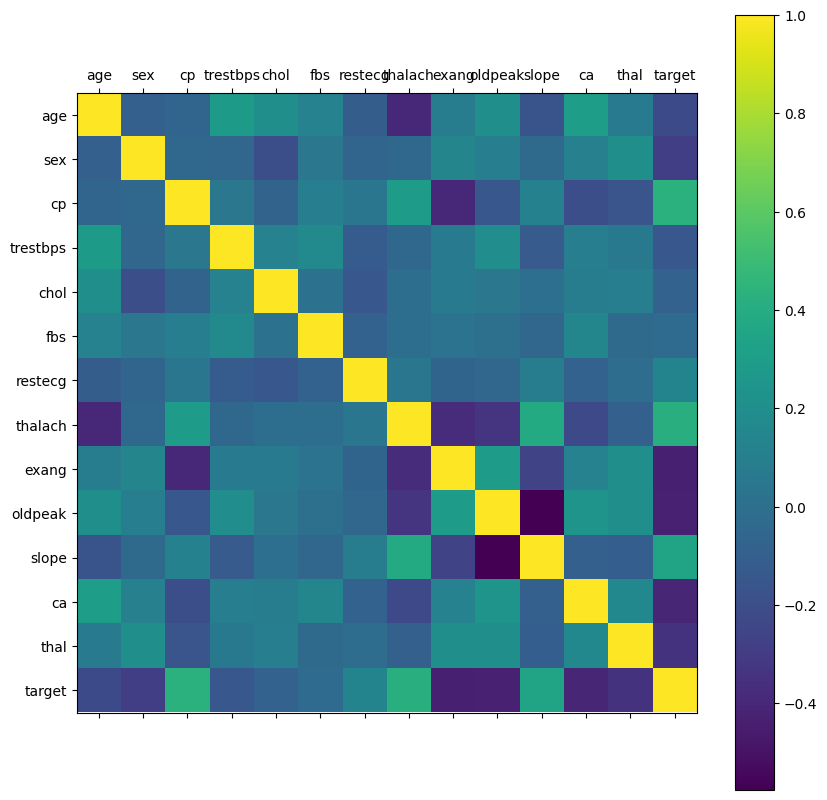

In [41]:
rcParams['figure.figsize'] = 10, 10

plt.matshow(heartData.corr())
plt.yticks(np.arange(heartData.shape[1]), heartData.columns)
plt.xticks(np.arange(heartData.shape[1]), heartData.columns)
plt.colorbar()

### Divide the data into training and testing classes

In [42]:
X = heartData.drop(['target'], axis=1)
y = heartData['target']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state=0)

print("XTrain: ",X_train.shape[0],"XTest: ",X_test.shape[0])
print("Ytrain: ",y_train.shape[0],"Ytest: ",y_test.shape[0])

XTrain:  211 XTest:  91
Ytrain:  211 Ytest:  91


## Model Building

### KNN Algorithm

In [43]:
knn_scores = []

for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train.values, y_train.values)
    knn_score = round(knn_classifier.score(X_test.values, y_test.values), 2)
    knn_scores.append(knn_score)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_score = knn_classifier.predict(X_test)
print(classification_report(y_test, knn_score))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54        45
           1       0.58      0.70      0.63        46

    accuracy                           0.59        91
   macro avg       0.60      0.59      0.59        91
weighted avg       0.60      0.59      0.59        91



In [44]:
score_knn = round(accuracy_score(knn_score, y_test)*100,2)
print(f"The accuracy score achieved using KNN is {score_knn}")

The accuracy score achieved using KNN is 59.34


Text(0.5, 1.0, 'KNN Scores for different K neighbors')

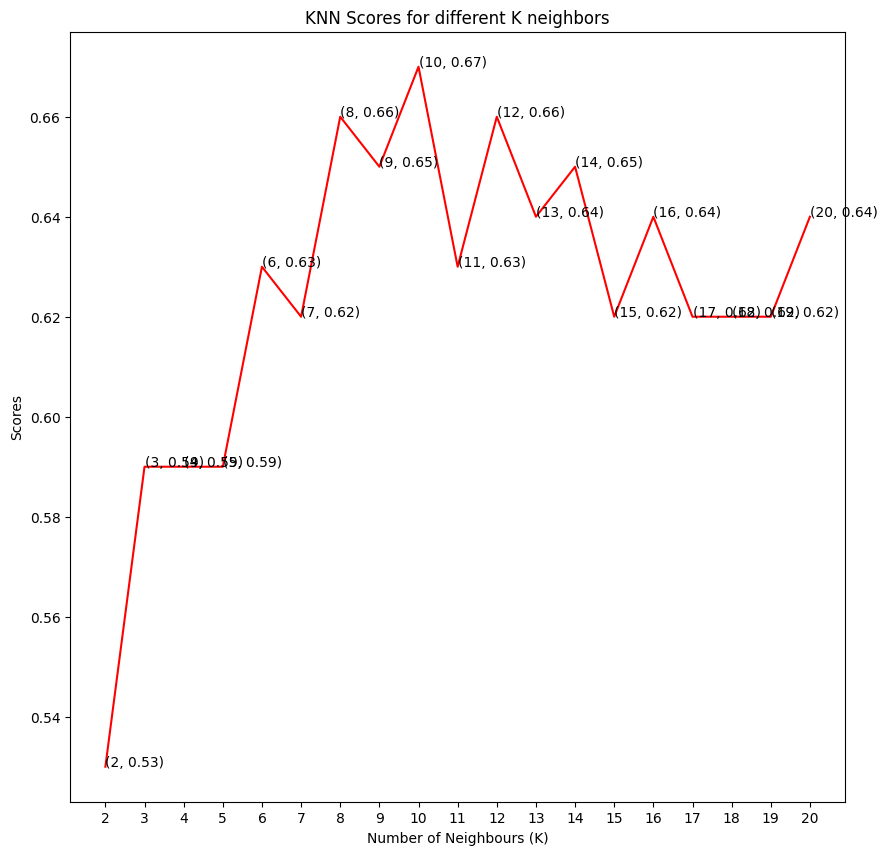

In [45]:
plt.plot([k for k in range(2, 21)], knn_scores, color='red')

for i in range(2,21):
    plt.text(i, knn_scores[i-2], (i, knn_scores[i-2]))

plt.xticks([i for i in range(2,21)])
plt.xlabel("Number of Neighbours (K)")
plt.ylabel('Scores')
plt.title('KNN Scores for different K neighbors')

### Support Vector Machine

In [46]:
from sklearn.metrics import accuracy_score

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in range(len(kernels)):
    svc_classifier = SVC(kernel=kernels[i])
    svc_classifier.fit(X_train.values, y_train.values)
    svc_scores.append(round(svc_classifier.score(X_test.values, y_test.values), 2))

svc_classifier = SVC(kernel = kernels[0])
svc_classifier.fit(X_train.values, y_train.values)
svc_prediction_result = svc_classifier.predict(X_test.values)

# print(svc_prediction_result)

print("Accuracy Score: ", accuracy_score(y_test.values, svc_prediction_result))


Accuracy Score:  0.8241758241758241


Text(0.5, 1.0, 'SVM scores Activation function wise')

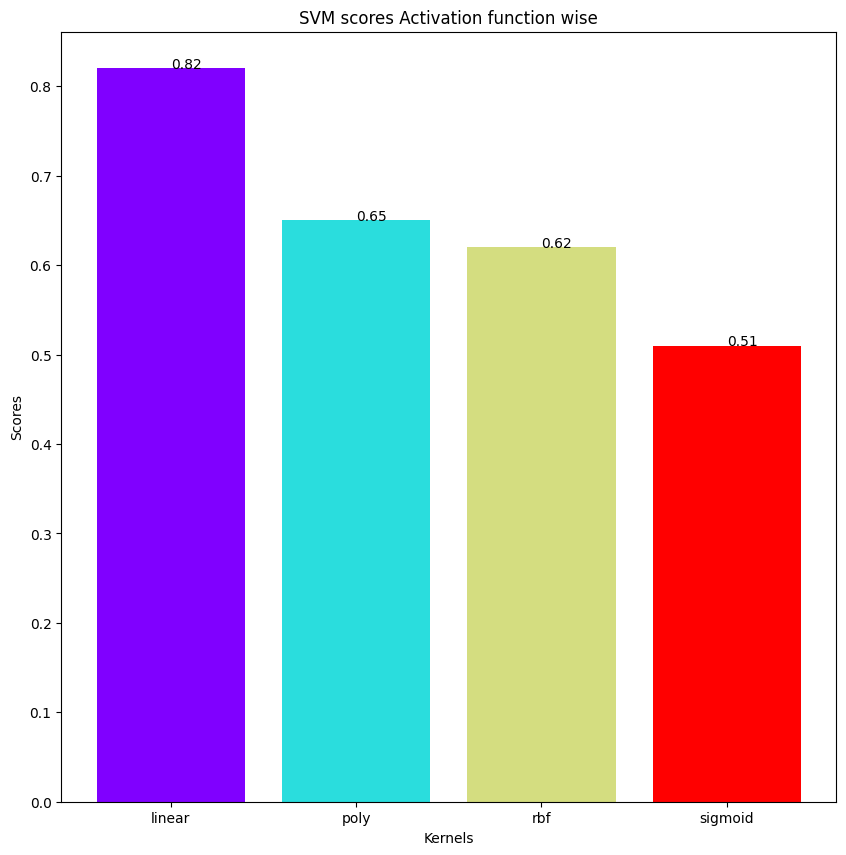

In [47]:
colors = rainbow(np.linspace(0, 1, len(kernels)))

plt.bar(kernels, svc_scores, color=colors)

for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVM scores Activation function wise')

In [48]:
score_svm = round(accuracy_score(svc_prediction_result,y_test)*100,2)
print(f"The accuracy score achieved using Linear SVM is {score_svm}")

The accuracy score achieved using Linear SVM is 82.42


### Decision Tree

In [49]:
dt_scores = []

for i in range(1, len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(X_test.values, y_test.values), 2))

print("Dt_scores: ", dt_scores)

Dt_scores:  [0.67, 0.7, 0.79, 0.78, 0.79, 0.76, 0.76, 0.84, 0.73, 0.77, 0.76, 0.73, 0.74]


In [50]:
score_dt = round(max(dt_scores)*100, 2)
print(f"The accuracy score achieved using Decision Tree is {score_dt}%")

The accuracy score achieved using Decision Tree is 84.0%


In [51]:
dt_classifier = DecisionTreeClassifier(max_features=13, random_state=0)
dt_classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different no. of maximum features')

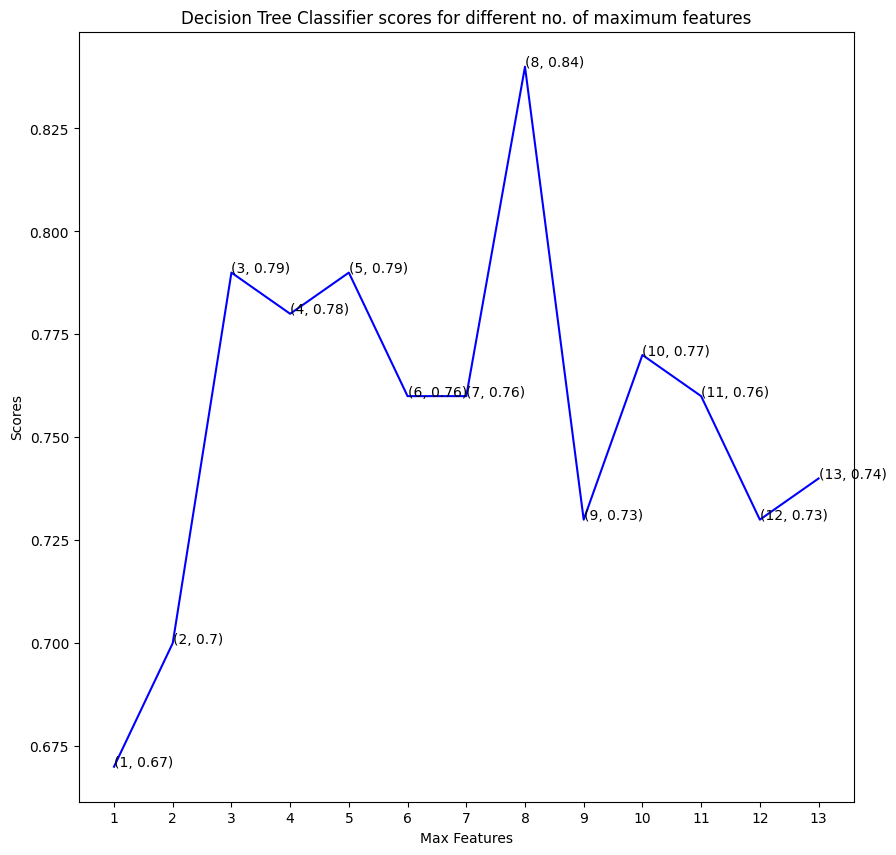

In [52]:
plt.plot([i for i in range(1, len(X.columns)+1)], dt_scores, color='blue')

for i in range(1, len(X.columns)+1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))

plt.xticks([i for i in range(1, len(X.columns)+1)])
plt.xlabel('Max Features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different no. of maximum features')

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_scores = []

estimators = [10, 20, 100, 200, 500]

for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train.values, y_train.values)
    rf_scores.append(round(rf_classifier.score(X_test.values, y_test.values), 2))

Text(0.5, 1.0, 'Random Forest Classifier scores for different no. of estimators')

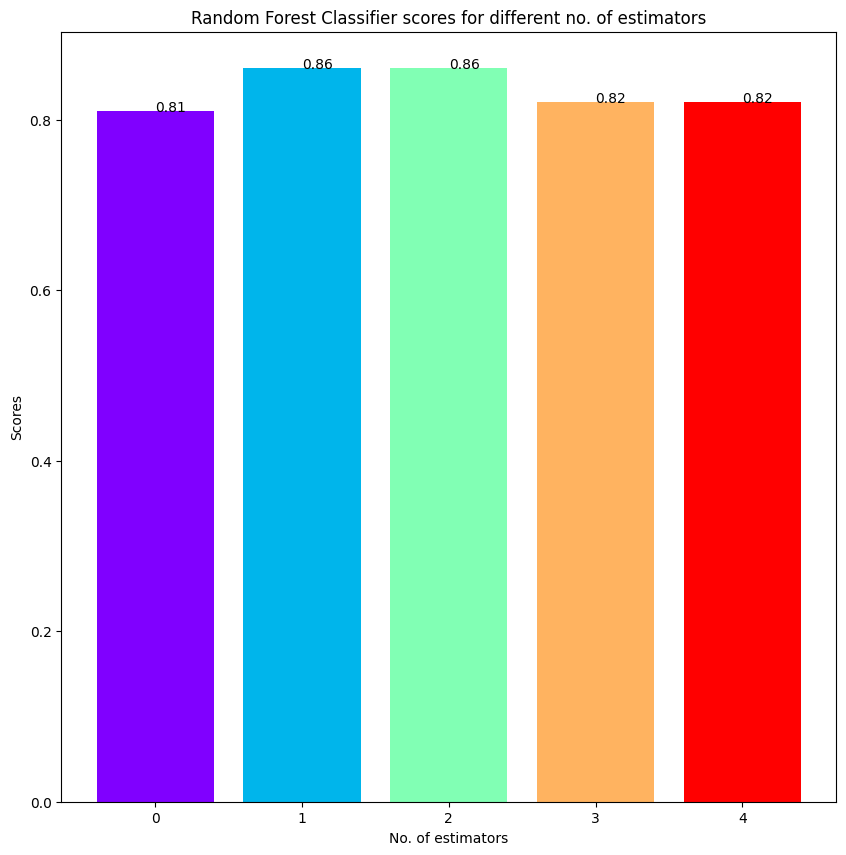

In [55]:
colors = rainbow(np.linspace(0, 1, len(estimators)))

plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width=0.8)

for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])

plt.xlabel('No. of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different no. of estimators')

In [56]:
score_rf = round(max(rf_scores)*100,2)
print(f"The accuracy score achieved using Random Forest is {score_rf}")

The accuracy score achieved using Random Forest is 86.0


### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train.values, y_train.values)
logistic_model_prediction = logistic_model.predict(X_test.values)

print("Accuracy score: ", accuracy_score(y_test.values, logistic_model_prediction))
print(classification_report(y_test.values, logistic_model_prediction))

Accuracy score:  0.8131868131868132
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.77      0.89      0.83        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [59]:
score_lr = round(accuracy_score(logistic_model_prediction, y_test)*100,2)
print(f"The accuracy scored achieved using Logistic Regression is {score_lr}")

The accuracy scored achieved using Logistic Regression is 81.32


### Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb = GaussianNB()
nb.fit(X_train, y_train)

Y_pred_nb = nb.predict(X_test)

In [62]:
score_nb = round(accuracy_score(Y_pred_nb, y_test)*100,2)
print(f"The accuracy score achieved using naive bayes is: {score_nb}%")

The accuracy score achieved using naive bayes is: 82.42%


## Output Final Score

In [63]:
scores = [score_lr, score_svm, score_knn, score_dt, score_rf, score_nb]
algorithms = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Naive Bayes"]

for i in range(len(algorithms)):
    print(f"{algorithms[i]} Accuracy: {scores[i]}%")

Logistic Regression Accuracy: 81.32%
Support Vector Machine Accuracy: 82.42%
K-Nearest Neighbors Accuracy: 59.34%
Decision Tree Accuracy: 84.0%
Random Forest Accuracy: 86.0%
Naive Bayes Accuracy: 82.42%


### Save Trained Models

In [64]:
import pickle

Saving the logistic regression model

In [65]:
pickle.dump(logistic_model, open('logistic_regression.model', 'wb'))

Saving the SVM Model

In [66]:
pickle.dump(svc_classifier, open('svm.model', 'wb'))

Saving Decision Tree Classifier

In [67]:
pickle.dump(dt_classifier, open('dt.model', 'wb'))

Saving Naive Bayes Classifier

In [68]:
pickle.dump(nb, open('naive_bayes.model', 'wb'))

Saving the KNN Model

In [69]:
pickle.dump(knn_classifier, open('knn.model', 'wb'))